**Objective**
-----------
The dataset includes Google Trends data of keywords from the first of January. The trends of these keywords over time has been analysed with the prediction of hightened frequency of resolution-like keywords like 'diet','gym' and 'finance' in the initial months. Methods such as time series analysis were used to check for trends and seasonality.

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set() #switches to default seaborn 

In [3]:
#importing the data
df = pd.read_csv('multiTimeline.csv', skiprows=1)
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
Month                   168 non-null object
diet: (Worldwide)       168 non-null int64
gym: (Worldwide)        168 non-null int64
finance: (Worldwide)    168 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.3+ KB


In [6]:
df.columns = ['month', 'diet', 'gym', 'finance'] #renaming columns
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [7]:
df.month = pd.to_datetime(df.month) #since month was a DF Object in df.info
df.set_index('month', inplace=True) #setting month as the index

In [8]:
df.head() #verifying

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


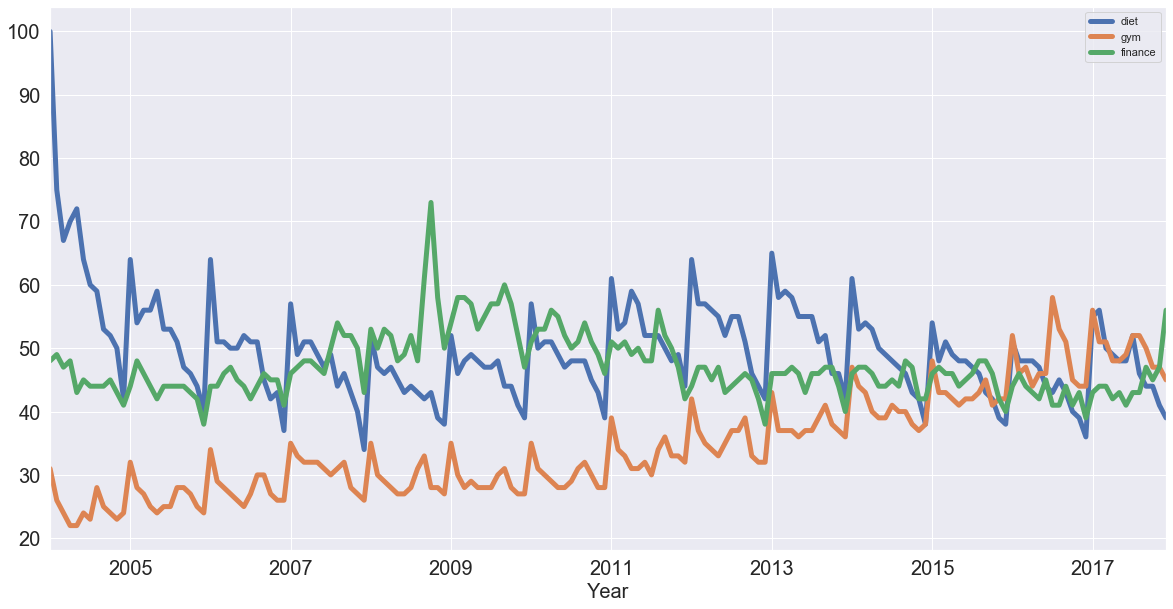

In [11]:
#initial EDA
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. Likewise a score of 0 means the term was less than 1% as popular as the peak.

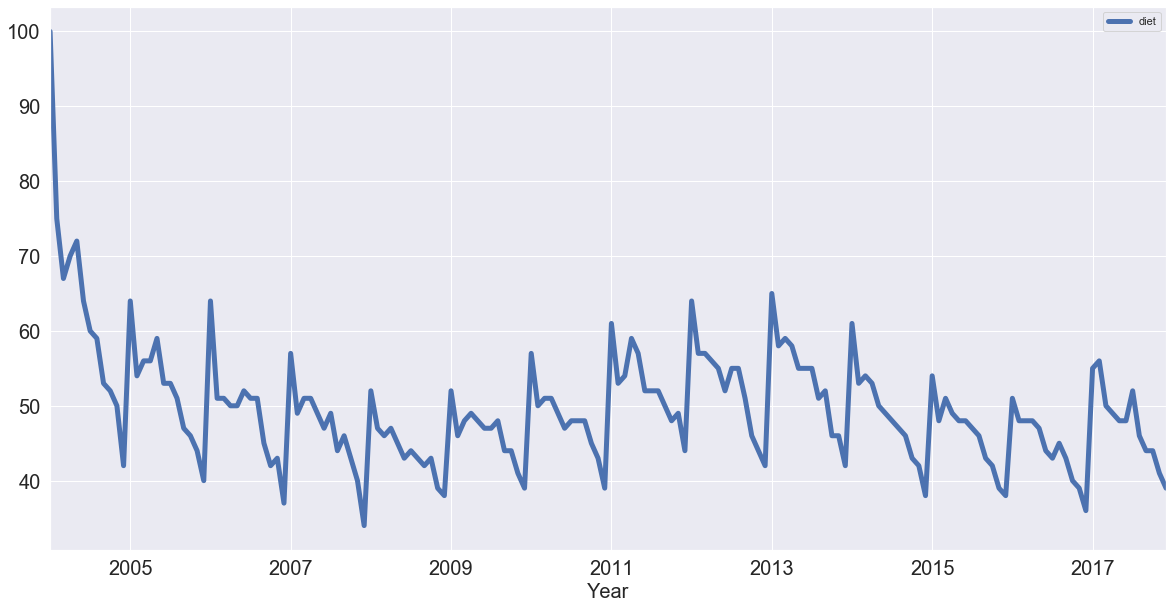

In [12]:
df[['diet']].plot(figsize=(20,10), linewidth=5, fontsize=20) #plotting a single column
plt.xlabel('Year', fontsize=20);

each January, there's a big jump. Also, there seems to be a trend: it seems to go slightly up, then down, back up and then back down. In other words, it looks like there are trends and seasonal components to these time series

What happens then because we take the average is it tends to smooth out noise and seasonality.

When it comes to determining the window size, here, it makes sense to first try out one of twelve month.

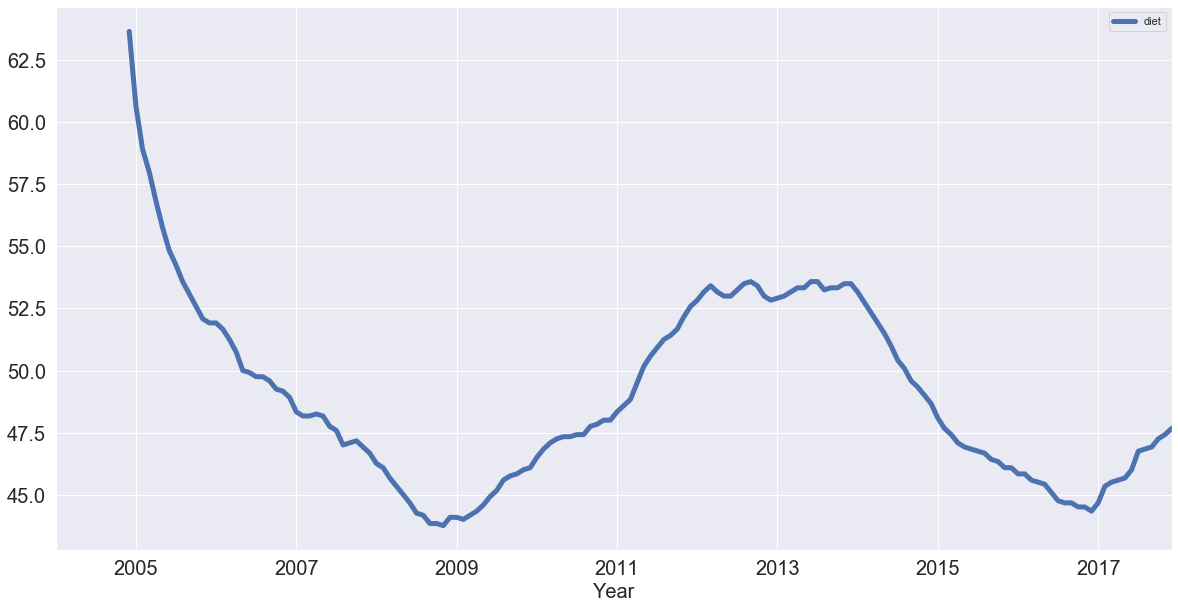

In [15]:
diet = df[['diet']] #double brackets to extract as DF instead of SERIES
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

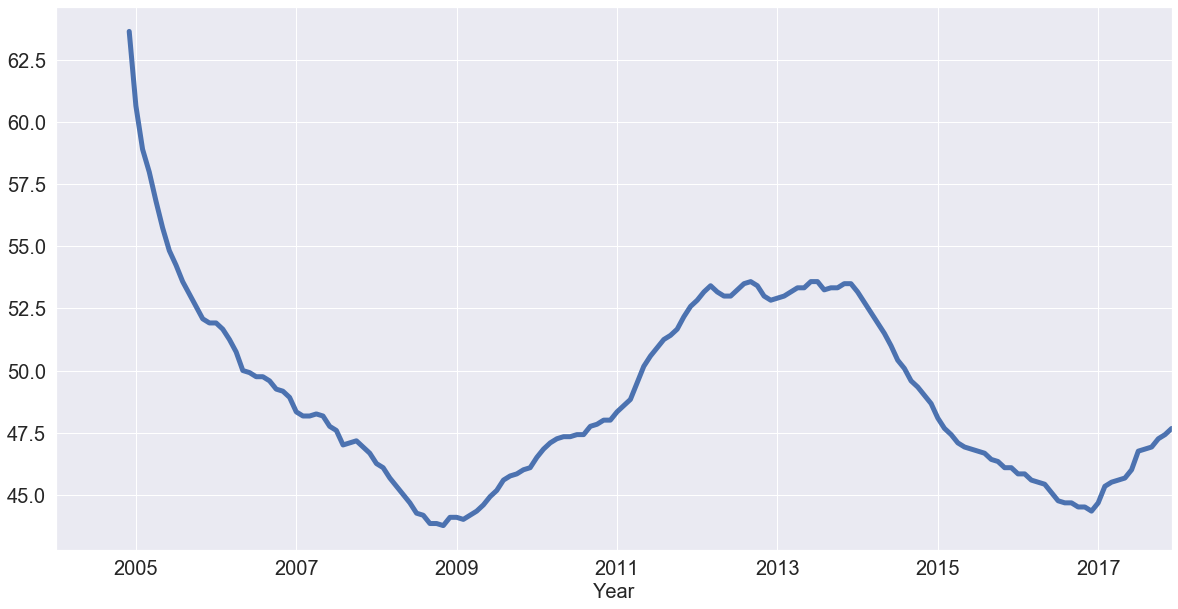

In [14]:
diet = df['diet'] #doesnt really chagne much
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

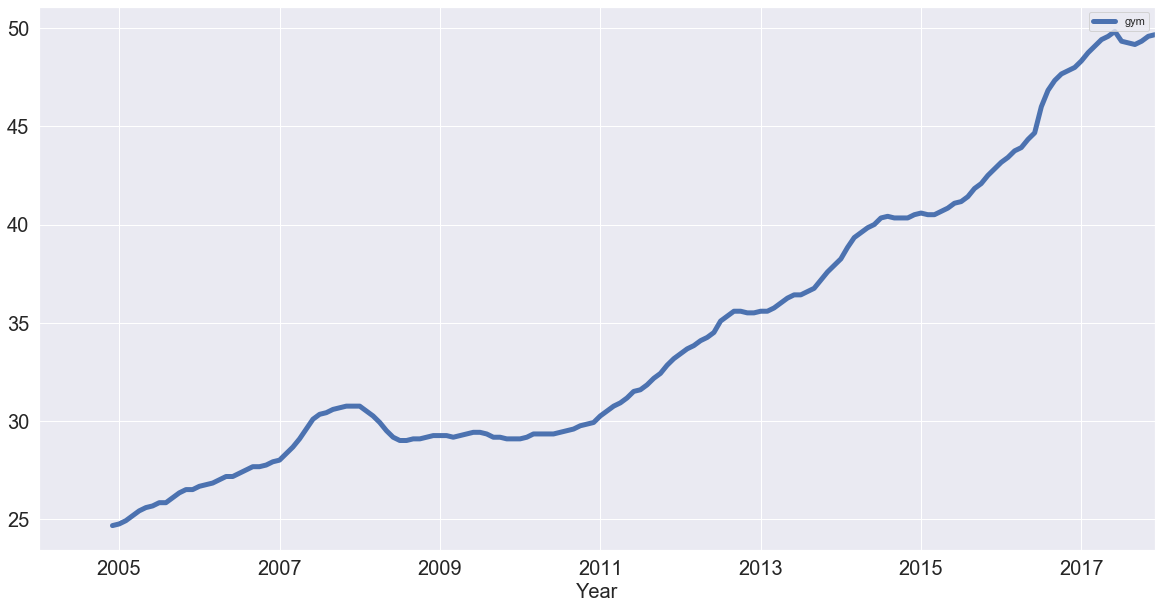

In [16]:
gym = df[['gym']]
gym.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

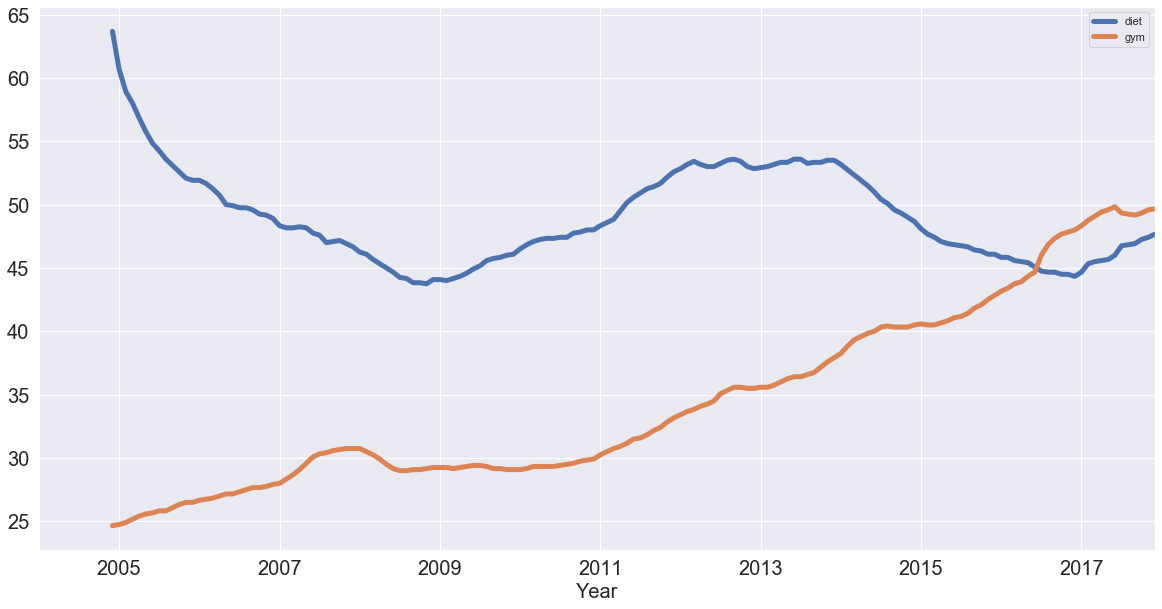

In [17]:
#how to compare
df_rm = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

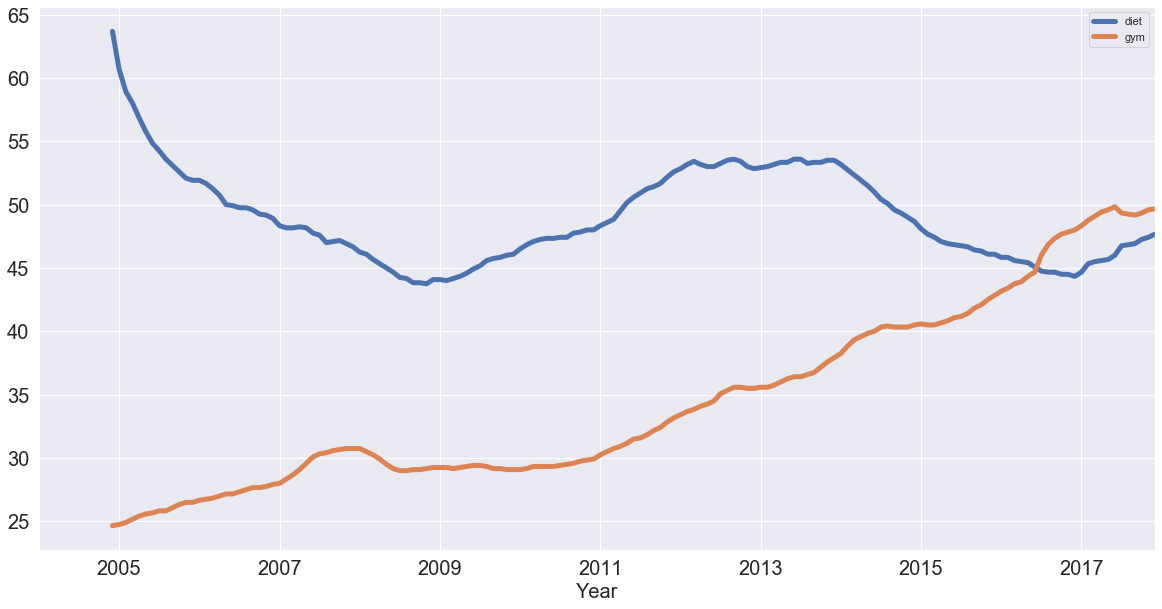

In [21]:
#trial
concat = df[["diet","gym"]] #trying out a different method of combining columns
concat.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

One way to think about the seasonal components to the time series of data is to remove the trend from a time series, so that we can more easily investigate seasonality. To remove the trend, we can subtract the trend you computed above (rolling mean) from the original signal. This, however, will be dependent on how many data points we averaged over.

Another way to remove the trend is called "differencing", where we look at the difference between successive data points (called "first-order differencing", because we're only looking at the difference between one data point and the one before it).

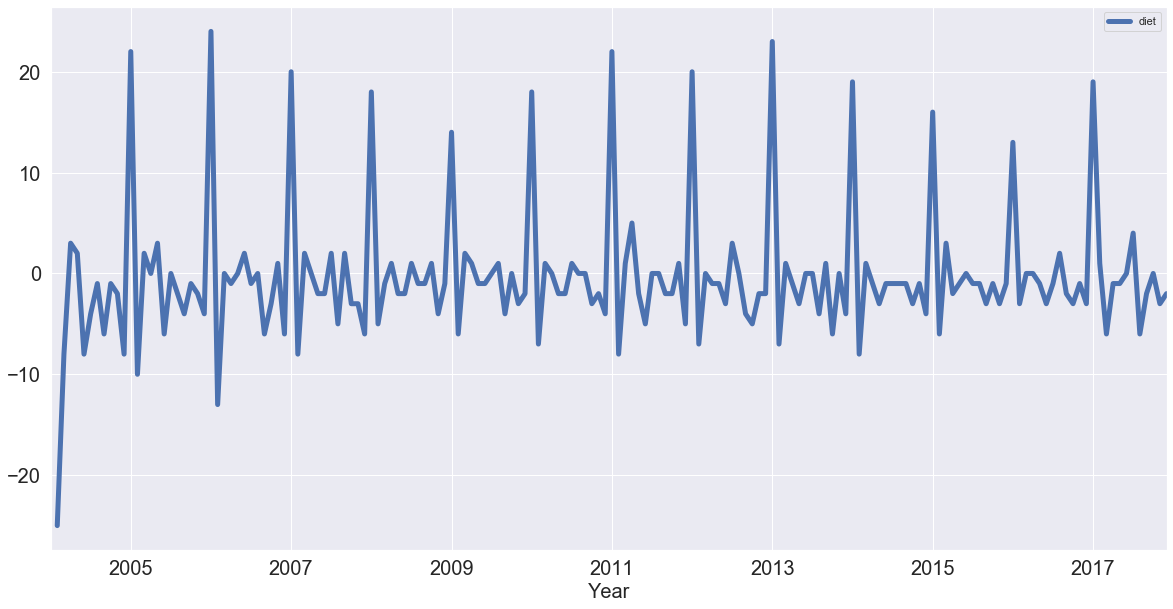

In [22]:
diet.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

We can really see the peaks in January every year. Each January, there is a huge spike of 20 or more percent on the highest search item.

A time series is periodic if it repeats itself at equally spaced intervals, say, every 12 months.

Another way to think of this is that if the time series has a peak somewhere, then it will have a peak 12 months after that and, if it has a trough somewhere, it will also have a trough 12 months after that.

Yet another way of thinking about this is that the time series is correlated with itself shifted by 12 months. That means that, if you took the time series and moved it 12 months backwards or forwards, it would map onto itself in some way.

Considering the correlation of a time series with such a shifted version of itself is captured by the concept of autocorrelation.

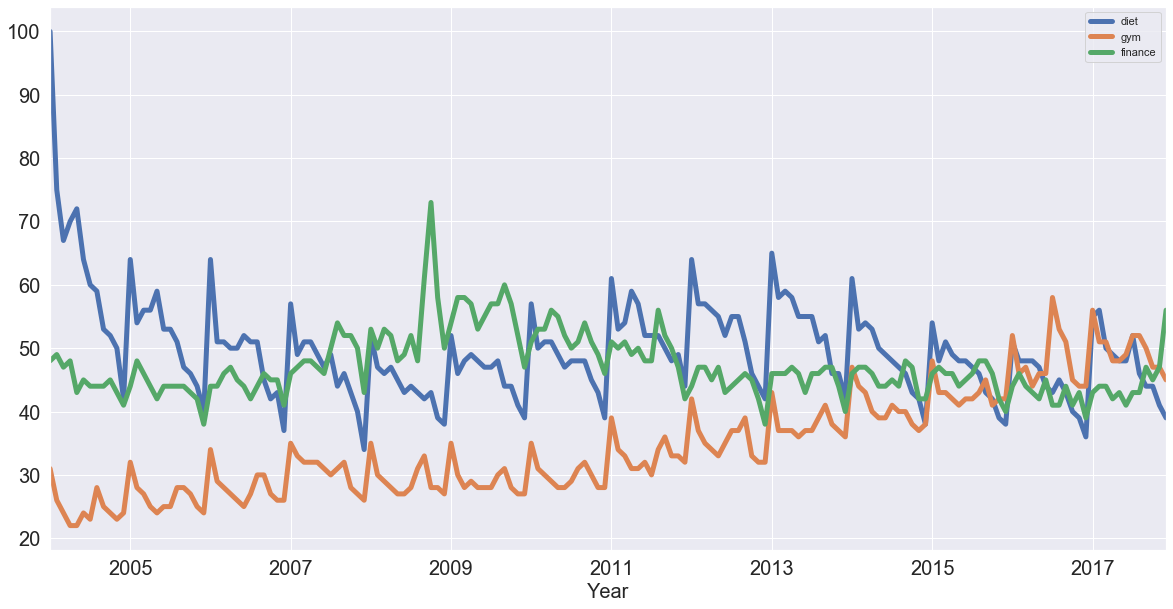

In [23]:
#plotting again
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [24]:
#computing correlations
df.corr()


,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


Let's focus on 'diet' and 'gym'; They are negatively correlated. That's very interesting! From the correlation coefficient, 'diet' and 'gym' are negatively correlated. However, from looking at the times series, it looks as though their seasonal components would be positively correlated and their trends negatively correlated

The actual correlation coefficient is actually capturing both of those.

What we want to do now is plot the first-order differences of these time series and then compute the correlation of those because that will be the correlation of the seasonal components, approximately. Removing the trend may reveal correlation in seasonality.

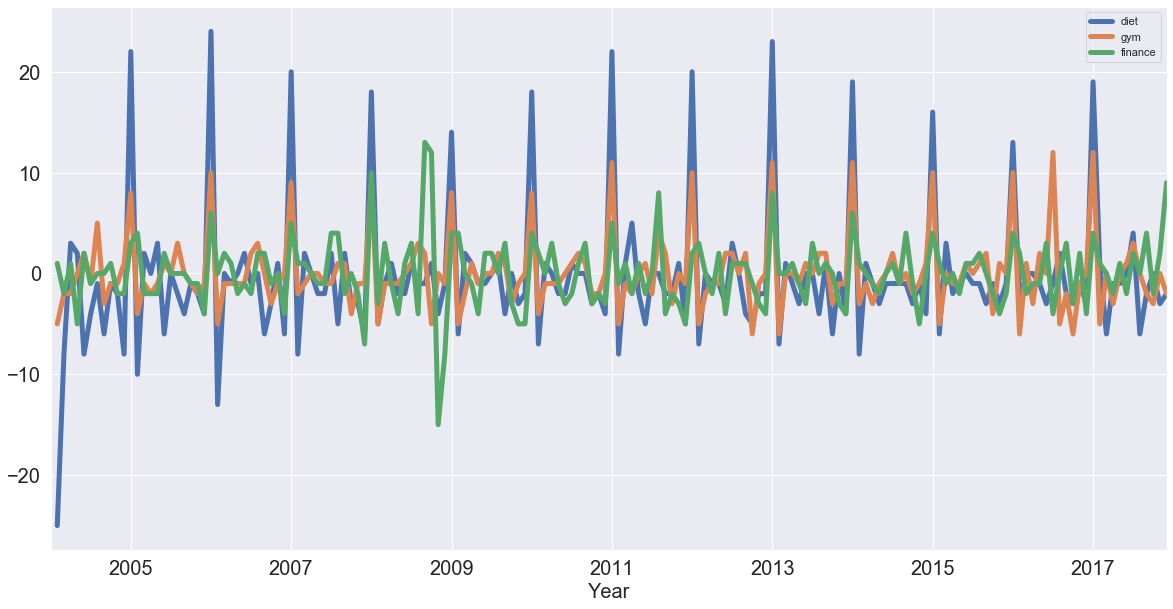

In [25]:
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

'diet' and 'gym' are incredibly correlated once the trend is removed. Now, to compute the correlation coefficients of the first-order differences of these time series:

In [26]:
df.diff().corr()

,diet,gym,finance
diet,1.000000,0.758707,0.373828
gym,0.758707,1.000000,0.301111
finance,0.373828,0.301111,1.000000


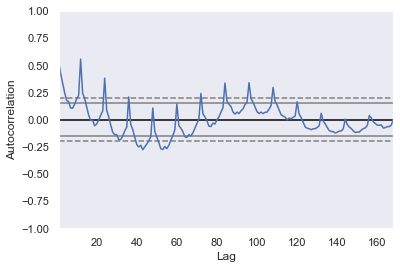

In [27]:
pd.plotting.autocorrelation_plot(diet);

The dotted lines in the above plot actually tell you about the statistical significance of the correlation. In this case, you can say that the 'diet' series is genuinely autocorrelated with a lag of twelve months.

We have identified the seasonality of this 12 month repetition!